# Import Libraries

In [1]:
import pandas as pd
import numpy as np 

# Visualization
import plotly.express as px # for data visualization
import matplotlib.pyplot as plt # for showing handwritten digits



In [10]:
# Sklearn
from sklearn.datasets import load_digits # for MNIST data
from sklearn.model_selection import train_test_split # for splitting data into train and test samples



In [3]:
# UMAP dimensionality reduction
!pip install umap-learn

from umap import UMAP

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 4.5 MB/s 
     |████████████████████████████████| 1.1 MB 46.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=1b83fec36f9022e349328caee416c95307f82d7ca576288ad57ccc9b2e5e0713
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=f273d95e964c2afca1208c7c1036731bee11b906e10360934cee6d62fa069386
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


# Load MNIST Dataset

Shape of digit images:  (1797, 8, 8)
Shape of X (main data):  (1797, 64)
Shape of y (true labels):  (1797,)


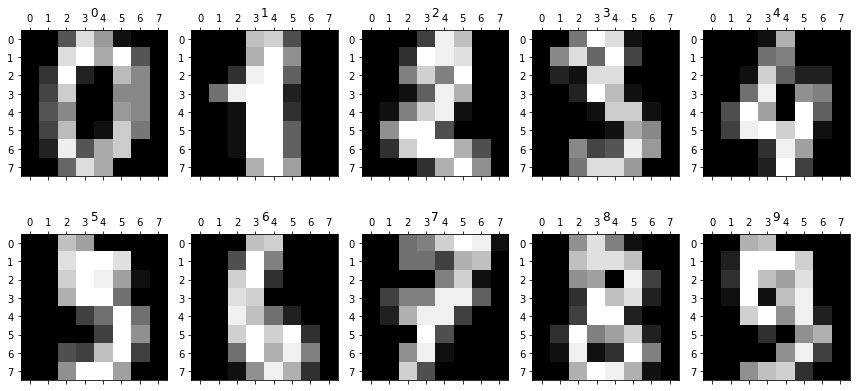

In [4]:
digits = load_digits()

# Load arrays containing digit data (64 pixels per image) and their true labels
X, y = load_digits(return_X_y=True)

# Some stats
print('Shape of digit images: ', digits.images.shape)
print('Shape of X (main data): ', X.shape)
print('Shape of y (true labels): ', y.shape)

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
plt.gray() 
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(digits.images[n])
        axs[i,j].set(title=y[n])
        n=n+1
plt.show() 

# 3D Plot Function

In [5]:
def chart(X, y):
    arr_concat=np.concatenate((X, y.reshape(y.shape[0],1)), axis=1)
   
    df=pd.DataFrame(arr_concat, columns=['x', 'y', 'z', 'label'])
    df['label'] = df['label'].astype(int)
    df.sort_values(by='label', axis=0, ascending=True, inplace=True)
  
    
    # Create a 3D graph
    fig = px.scatter_3d(df, x='x', y='y', z='z', color=df['label'].astype(str), height=900, width=950)

    # Update chart looks
    fig.update_layout(title_text='UMAP',
                      showlegend=True,
                      legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                      scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                            center=dict(x=0, y=0, z=-0.1),
                                            eye=dict(x=1.5, y=-1.4, z=0.5)),
                                            margin=dict(l=0, r=0, b=0, t=0),
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             ),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             )))
    # Update marker size
    fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
    
    fig.show()

# UMAP

In [6]:
uMap_model = UMAP(n_neighbors=100,
               n_components=3, 
               metric='euclidean', 
               n_epochs=1000, 
               learning_rate=1.0, 
               init='spectral',
               min_dist=0.1, 
               spread=1.0, 
               low_memory=False, 
               set_op_mix_ratio=1.0,
               local_connectivity=1, 
               repulsion_strength=1.0, 
               negative_sample_rate=5,
               transform_queue_size=4.0, 
               a=None, 
               b=None, 
               random_state=42,
               metric_kwds=None,
               angular_rp_forest=False, 
               target_n_neighbors=-1, 
               transform_seed=42,
               verbose=False, 
               unique=False,
              )

# Fit and transform the data
X_trans = uMap_model.fit_transform(X)

# Check the shape of the new data
print('Shape of X_trans: ', X_trans.shape)

Shape of X_trans:  (1797, 3)


## Visualizations

In [7]:
chart(X_trans, y)

# Supervised UMAP

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)


uMap_model2 = UMAP(n_neighbors=100, n_components=3, n_epochs=1000, 
                min_dist=0.5, local_connectivity=2, random_state=42,
              )


X_train_res = uMap_model2.fit_transform(X_train, y_train)

# Apply on a test set
X_test_res = uMap_model2.transform(X_test)

# Print the shape of new arrays
print('Shape of X_train_res: ', X_train_res.shape)
print('Shape of X_test_res: ', X_test_res.shape)

Shape of X_train_res:  (1347, 3)
Shape of X_test_res:  (450, 3)


## Visualizations -Supervised UMAP

In [9]:
chart(X_train_res, y_train)

# New Section